## Project Name: Heart Attack Risk Predictor

### In this project we will Make an app which will help us predict the risk of a Heart Attack a person have.
### We will do use various Algorithms to predict the result and see which one suits best and then we will use Auto ML Library EVAL ML to predict the results.

### We will do the following things:
- Data Analysis 
- Feature Engineering 
- Satandardization
- Model Building
- Predictions

### Let us import the necessary liabraries and read our DataSet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let us import our Data Set


In [ ]:
df = pd.read_csv("./heart.csv")

In [ ]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

In [ ]:
df.head()

### Data Analysis

### Understanding our DataSet:

#### Age : Age of the patient

#### Sex : Sex of the patient

#### exang: exercise induced angina (1 = yes; 0 = no)

#### ca: number of major vessels (0-3)

#### cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)

#### chol : cholestoral in mg/dl fetched via BMI sensor

#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalach : maximum heart rate achieved

#### target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

#### As we can see there are no null values in our Data Set

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr())

#### As we can see our variables are not highly correlated to each other 

#### We will do Uni and Bi variate analysis on our Features

In [ ]:

plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

#### As we can see the Patients are of Age Group 51-67years in majority

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)

In [ ]:
cp_data = df['cp'].value_counts().reset_index()
cp_data.columns = ['cp', 'count']  
cp_data.loc[cp_data.index == 3, 'cp'] = 'asymptomatic'
cp_data.loc[cp_data.index == 2, 'cp'] = 'non-anginal'
cp_data.loc[cp_data.index == 1, 'cp'] = 'Atypical Angina'
cp_data.loc[cp_data.index == 0, 'cp'] = 'Typical Angina'
cp_data


In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")

sns.barplot(x=cp_data['cp'], y=cp_data['count'])

plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

#### We have seen how the the Chest Pain Category is distributed

In [ ]:
ecg_data = df['restecg'].value_counts().reset_index()
ecg_data.columns = ['restecg', 'count']  # Renaming the columns
ecg_data.loc[ecg_data.index == 0, 'restecg'] = 'normal'
ecg_data.loc[ecg_data.index == 1, 'restecg'] = 'having ST-T wave abnormality'
ecg_data.loc[ecg_data.index == 2, 'restecg'] = 'showing probable or definite left ventricular hypertrophy by Estes'

ecg_data


In [ ]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")
sns.barplot(x=ecg_data['restecg'], y=ecg_data['count'])

#### This is our ECG Data 

In [ ]:
sns.pairplot(df, hue='output')
plt.show()

### Let us see for our Continuous Variable

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

#### We have done the Analysis of the data now let's have a look at out data

In [ ]:
df.head()

### Let us do Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
scale.fit(df)

In [ ]:
df= scale.transform(df)

In [ ]:
df=pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'])

In [ ]:
df.head()

### We can insert this data into our ML Models

### We will use the following models for our predictions :
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbour
- SVM

#### Then we will use the ensembling techniques

#### Let us split our data

In [ ]:
x= df.iloc[:,:-1]
x

In [ ]:
y= df.iloc[:,-1:]
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbl= LabelEncoder()

In [ ]:
encoded_y= lbl.fit_transform(y_train)

In [ ]:
logreg= LogisticRegression()

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)


In [ ]:
# Y_pred1

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
encoded_ytest= lbl.fit_transform(y_test)

In [ ]:
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [ ]:
lr_conf_matrix

In [ ]:
print(lr_acc_score*100,"%")

#### As we see the Logistic Regression Model have a 85% accuracy

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree= DecisionTreeClassifier()

In [ ]:
tree.fit(x_train,encoded_y)

In [ ]:
ypred2=tree.predict(x_test)

In [ ]:
encoded_ytest= lbl.fit_transform(y_test)

In [ ]:
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

In [ ]:
tree_conf_matrix

In [ ]:
print(tree_acc_score*100,"%")

#### As we see our Decision Tree Model does not perform well as it gives a score of only 69%

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier()

In [ ]:
rf.fit(x_train,encoded_y)

In [ ]:
ypred3 = rf.predict(x_test)

In [ ]:
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3 )
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

In [ ]:
rf_conf_matrix

In [ ]:
print(rf_acc_score*100,"%")

#### RF also gives us an accuracy of around 80%

### K Nearest Neighbour

#### We have to select what k we will use for the maximum accuracy
#### Let's write a function for it

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != encoded_ytest))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

#### As we see from the graph we should select K= 12 as it gives the best error rate

In [ ]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,encoded_y)
ypred4= knn.predict(x_test)


In [ ]:
knn_conf_matrix = confusion_matrix(encoded_ytest,ypred4 )
knn_acc_score = accuracy_score(encoded_ytest, ypred4)

In [ ]:
knn_conf_matrix

In [ ]:
print(knn_acc_score*100,"%")

#### As we see KNN gives us an accuracy of around 85% which is good

### Support Vector Machine(SVM)

In [ ]:
from sklearn import svm

In [ ]:
svm= svm.SVC()

In [ ]:
svm.fit(x_train,encoded_y)

In [ ]:
ypred5= svm.predict(x_test)

In [ ]:
svm_conf_matrix = confusion_matrix(encoded_ytest,ypred5)
svm_acc_score = accuracy_score(encoded_ytest, ypred5)

In [ ]:
svm_conf_matrix

In [ ]:
print(svm_acc_score*100,"%")

#### We get an accuracy of 80% in SVM

#### Let us see our model accuracy in Table form

In [ ]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})

In [ ]:
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [ ]:
model_acc

#### Let us use one more Techniques known as Adaboost, this is a Boosting technique which uses multiple models for better accuracy.

### Adaboost  Classifier

#### Let us first use some random parameters for training the model without Hypertuning.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adab = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', learning_rate=0.01, random_state=0)


In [ ]:
adab.fit(x_train,encoded_y)

In [ ]:
ypred6=adab.predict(x_test)

In [ ]:
adab_conf_matrix = confusion_matrix(encoded_ytest,ypred6)
adab_acc_score = accuracy_score(encoded_ytest, ypred6)

In [ ]:
adab_conf_matrix

In [ ]:
print(adab_acc_score*100,"%")

In [ ]:
adab.score(x_train,encoded_y)

In [ ]:
adab.score(x_test,encoded_ytest)

#### As we see our model has performed very poorly with just 50% accuracy 

#### We will use Grid Seach CV for HyperParameter Tuning

### Grid Search CV

#### Let us try Grid Search CV for our top 3 performing Algorithms for HyperParameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_acc

### Logistic Regression

In [ ]:
param_grid= {
    
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
    
}

In [ ]:
grid1= GridSearchCV(LogisticRegression(),param_grid)

In [ ]:
grid1.fit(x_train,encoded_y)

In [ ]:
grid1.best_params_

#### Let us apply these para in our Model

In [ ]:
logreg1= LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [ ]:
logreg1.fit(x_train,encoded_y)

In [ ]:
logreg_pred= logreg1.predict(x_test)

In [ ]:
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest,logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest, logreg_pred)

In [ ]:
logreg_pred_conf_matrix

In [ ]:
print(logreg_pred_acc_score*100,"%")

#### We got an accuracy of 81%

### KNN

In [ ]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [ ]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_search.fit(x_train,encoded_y)

In [ ]:
grid_search.best_params_

#### Let's apply

In [ ]:
knn= KNeighborsClassifier(n_neighbors=12,metric='manhattan',weights='distance')
knn.fit(x_train,encoded_y)
knn_pred= knn.predict(x_test)

In [ ]:
knn_pred_conf_matrix = confusion_matrix(encoded_ytest,knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest, knn_pred)

In [ ]:
knn_pred_conf_matrix

In [ ]:
print(knn_pred_acc_score*100,"%")

#### We have an Accuracy of 82.5%

### SVM

In [ ]:

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_search.fit(x_train,encoded_y)

In [ ]:
grid_search.best_params_

#### Let us apply these

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc= SVC(C= 0.1, gamma= 'scale',kernel= 'sigmoid')

In [ ]:
svc.fit(x_train,encoded_y)

In [ ]:
svm_pred= svc.predict(x_test)

In [ ]:
svm_pred_conf_matrix = confusion_matrix(encoded_ytest,svm_pred)
svm_pred_acc_score = accuracy_score(encoded_ytest, svm_pred)

In [ ]:
svm_pred_conf_matrix

In [ ]:
print(svm_pred_acc_score*100,"%")

#### Accuracy is 81%

## Final Verdict

#### After comparing all the models the best performing model is :
### Logistic Regression with no Hyperparameter tuning

In [ ]:
logreg= LogisticRegression()
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

In [ ]:
Y_pred1

In [ ]:
lr_conf_matrix

In [ ]:
print(lr_acc_score*100,"%")

#### Let us build a proper confusion matrix for our model

In [ ]:
# Confusion Matrix of  Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(lr_conf_matrix, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY of our model is ",lr_acc_score*100,"%")

## We have succesfully made our model which predicts weather a person is having a risk of Heart Disease or not with 85.7% accuracy

In [ ]:
import pickle

In [ ]:
pickle.dump(logreg,open('heart.pkl','wb'))

# **Using Auto ML**


# EVAL ML : 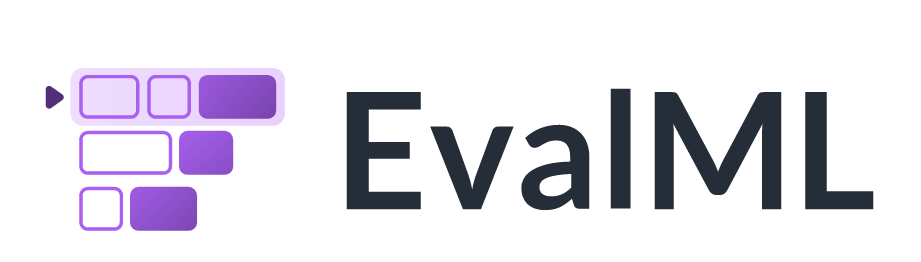
### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.





## Installing Eval ML

In [ ]:
%pip install evalml 

# Let us load our DataSet.

In [ ]:
df= pd.read_csv("./heart.csv")

In [ ]:
df.head()

Let us split our Data Set into Dependent i.e our Targer variable and independent variable

In [ ]:
x= df.iloc[:,:-1]
x

In [ ]:
y= df.iloc[:,-1:]
y= lbl.fit_transform(y)
y

# **Importing Eval ML Library**

In [ ]:
import evalml

Eval ML Library will do all the pre processing techniques for us and split the data for us

In [ ]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

There are different problem type parameters in Eval ML, we have a Binary type problem here, that's why we are using Binary as a input

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

**Running the Auto ML to select best Algorithm**

In [ ]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

As we see from the above output thge Auto ML Classifier has given us the best fit Algorithm which is Extra Trees Classifier with Imputer
We can also commpare the rest of the models

In [ ]:

automl.rankings


In [ ]:
automl.best_pipeline

In [ ]:
best_pipeline=automl.best_pipeline

We can have a Detailed description of our Best Selected Model

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])

In [ ]:
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

Now if we want to build our Model for a specific objective we can do that 

In [ ]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,problem_type='binary',objective='auc',additional_objectives=['f1', 'precision'],max_batches=1,optimize_thresholds=True)

automl_auc.search()

In [ ]:
automl_auc.rankings

In [ ]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])

In [ ]:
best_pipeline_auc = automl_auc.best_pipeline

In [ ]:

# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

We got an 88.5 % AUC Score which is the highest of all

Save the model

In [ ]:
best_pipeline.save("model.pkl")

Loading our Model

In [ ]:

final_model=automl.load('model.pkl')

In [ ]:
final_model.predict_proba(X_test)